In [1]:
#Exercici 1
#Classifica els diferents vols utilitzant l'algorisme de K-means.

%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df2 = pd.read_csv("DelayedFlights.csv")
df2 = df2.loc[df2.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]


df2.dropna(inplace = True)

msk = np.random.rand(len(df2)) < 0.001

df = df2[msk]



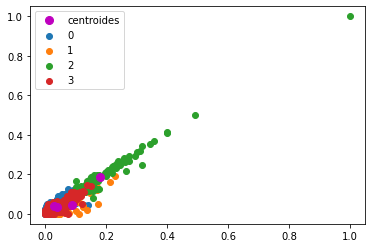

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
np.random.seed(1)

feature_cols = ["ArrDelay","DepDelay","TaxiOut"]



min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform( df[feature_cols].values)


n = 4
k_means = KMeans(n_clusters=n)
k_means.fit(X)
Z=k_means.predict(X)

#El resultado son 5 centroides que agrupen els punts
#y etiqueta de cada punt indica al cluster que pertanyen
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

 
#Grafiquemels resultats

#Obtenim les etiquetes
 
u_labels = np.unique(etiquetas)
 


for i in u_labels:
    plt.scatter(X[etiquetas== i , 0] , X[etiquetas == i , 1] , label = i)

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

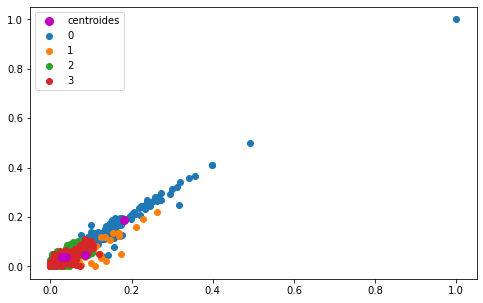

In [3]:
#Exercici 2
#Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.


#Importing required libraries
 
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
 
 
#Creating the model
 
agg_clustering = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
 
#predicting the labels
 
labels = agg_clustering.fit_predict(X)
 
#Plotting the results
 
u_labels = np.unique(labels)
 
plt.figure(figsize = (8,5))


for i in u_labels:
    plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i)

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()





#automatic
#dist_matrix = distance_matrix(feature_mtx,feature_mtx) 

#print(dist_matrix)


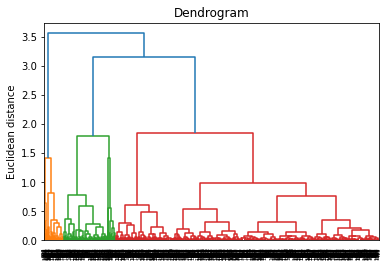

In [4]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
 
#Getting the data ready

#Linkage Matrix
Z = linkage(X, method = 'ward')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Silhouetter Score: 0.617
Silhouetter Score: 0.569
Silhouetter Score: 0.454
Silhouetter Score: 0.465


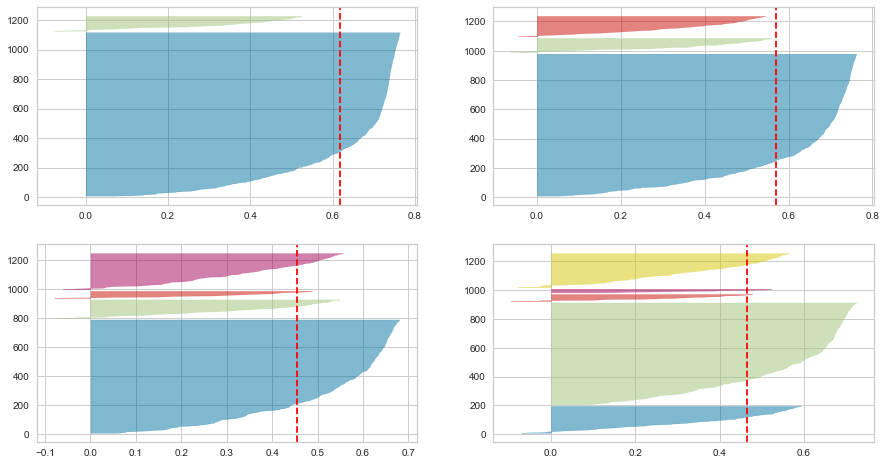

In [5]:

#- Exercici 3
#Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
 

    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    print('Silhouetter Score: %.3f' % silhouette_score(X, visualizer.labels_, metric='euclidean'))

In [6]:
#Pel numero de clusters 2 i 3 no es veuen optims donat que hi ha cluster per sota de la mitjana 
#Les grafiques amb numero de clusters 4 i 5 estan tots per sobre la mitjana,  però en la última gràfica hi ha un cluster
#que practicament despareix. Sembla millor el repartit en 4.